In [8]:
from captcha.image import ImageCaptcha
from PIL import Image
import numpy as np
import random
import string
from skimage.io import imshow
from sklearn.model_selection import train_test_split

In [9]:
def id_generator(size=6, chars=string.digits + string.ascii_uppercase):
    return ''.join(random.choice(chars) for _ in range(size))

In [10]:
def captcha_gen(string_size, generator):
    string = id_generator(string_size)
    img = generator.generate_image(string)
    pix = np.array(img)
        
    return pix, string

In [11]:
def data_gen(size=10000, captcha_width=160, captcha_height=60, string_size=6):
    image = ImageCaptcha(width=captcha_width, height=captcha_height)

    char_set = list(string.digits + string.ascii_uppercase)
    char_set_size = len(char_set)
    
# diccionaries for embedding    
#     char2index = {x[0]: i for i, x in enumerate(char_set)}
#     index2char = {v:k for k, v in char2index.items()}
    
    X = np.zeros(shape=(size,60,160,3), dtype='uint8')
    y = np.zeros(shape=(size, string_size, char_set_size))
    
    for i in range(size):
        X[i], string_ = captcha_gen(string_size, image)
        for j, char in enumerate(string_):
            k = char_set.index(char)
            y[i,j,k] += 1
            
    y = np.reshape(y, (y.shape[0], y.shape[1]*y.shape[2]))
    
    X = X.astype('float32')
    
    
    #X /= 255
            
    return X, y

In [12]:
X, y = data_gen(string_size=4, size=15000)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
X_train /= 255
X_test /= 255
y_train /= 255
y_test /= 255

/home/claudio/Documents/virtual_envs/deep_learning/lib/python3.5/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
/home/claudio/Documents/virtual_envs/deep_learning/lib/python3.5/site-packages/matplotlib/axes/_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


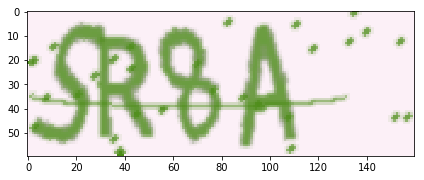

In [23]:
imshow(X_train[8])

In [24]:
np.save('data/train_inputs',X_train)
np.save('data/train_targets',y_train)

np.save('data/test_inputs',X_test)
np.save('data/test_targets',y_test)